<a href="https://colab.research.google.com/github/junghyeon0114/ESAA_OB_practice/blob/main/tensorflow_%EA%B8%B0%EB%B3%B8_%EB%B6%84%EB%A5%98_%EC%9D%98%EB%A5%98_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

기본 분류: 의류 이미지 분류

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


1. 패션 MNIST 데이터셋 임포트하기

- train_images와 train_labels 배열은 모델 학습에 사용되는 훈련 세트입니다.
- test_images와 test_labels 배열은 모델 테스트에 사용되는 테스트 세트입니다.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


- 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

2. 데이터 탐색

In [4]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

-> 각 레이블은 0과 9사이의 정수

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

3. 데이터 전처리



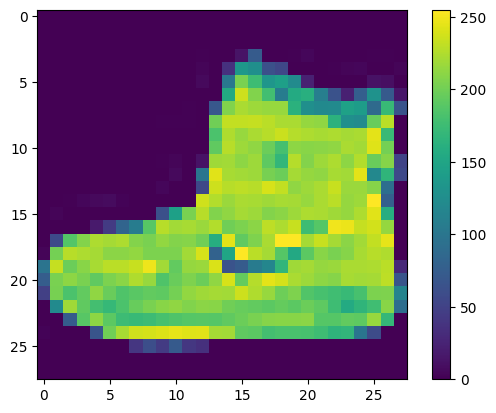

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

->  훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이임.

- 신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정: 255로 나누기

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

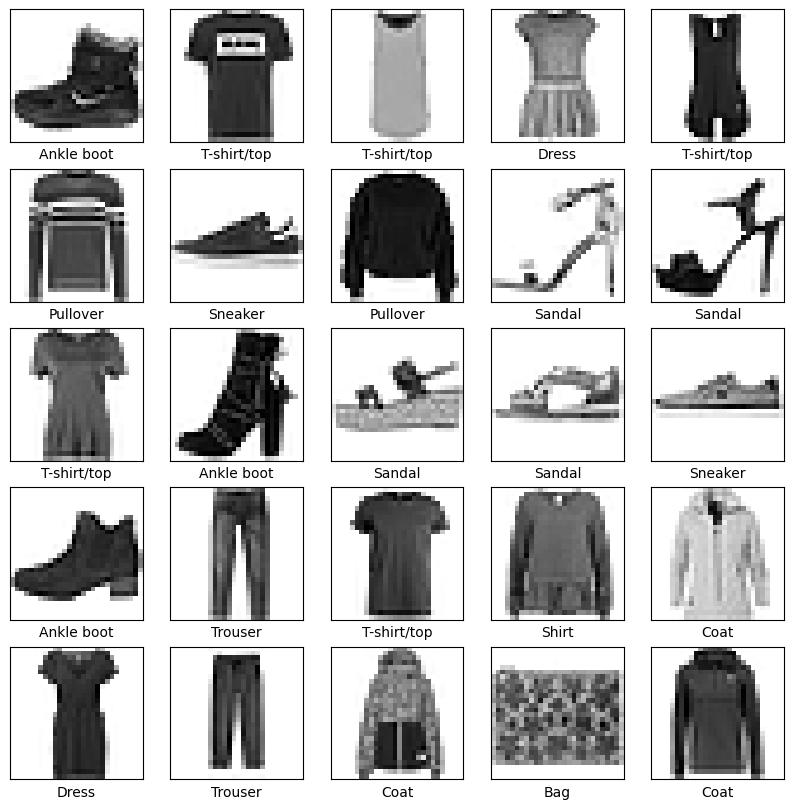

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

4. 모델 구성

- 층 설정

In [13]:
model = tf.keras.Sequential([
    # 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    # 첫 번째 Dense 층은 128개의 노드(또는 뉴런)를 가짐
    tf.keras.layers.Dense(128, activation='relu'),

    # 10개의 노드의 소프트맥스(softmax) 층
    tf.keras.layers.Dense(10)
])

- 모델 컴파일

  - 손실 함수 - 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 합니다.
  - 옵티마이저 - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식입니다.
  - 메트릭 — 훈련 및 테스트 단계를 모니터링하는 데 사용됩니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

5. 모델 훈련

1) 훈련 데이터를 모델에 주입 -이 예에서는 train_images와 train_labels 배열.
모델이 이미지와 레이블을 매핑하는 방법을 배움

2) 테스트 세트에 대한 모델의 예측을 만듦 : 이 예에서는 test_images 배열입니다. 이 예측이 test_labels 배열의 레이블과 맞는지 확인합니다.

3) 예측이 test_labels 배열의 레이블과 일치하는지 확인합니다.

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4972 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3741 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3361 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3135 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2967 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2812 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2695 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2603 - accuracy: 0.9027
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2478 - accuracy: 0.9092
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

In [16]:
# 정확도 평가

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3249 - accuracy: 0.8836 - 591ms/epoch - 2ms/step

Test accuracy: 0.8835999965667725


-> 테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮음. 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합(overfitting) 때문

예측하기

In [17]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [19]:
predictions[0]

array([2.5851543e-07, 7.3332565e-08, 2.6179782e-07, 4.5165999e-10,
       1.2902919e-07, 3.6317596e-04, 2.8091936e-06, 1.2073939e-03,
       3.4028497e-07, 9.9842548e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

- 그래프로 표현

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

- 예측 확인

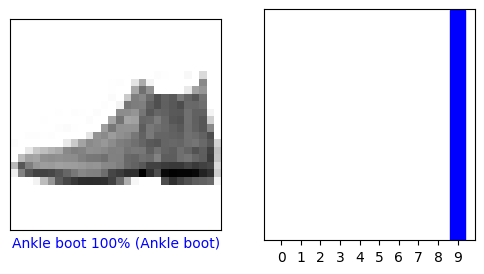

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

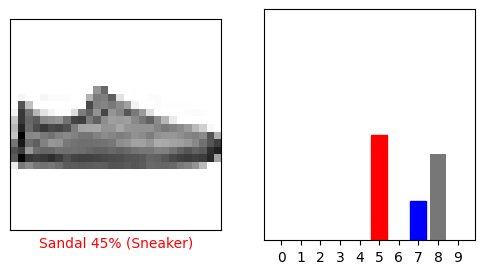

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

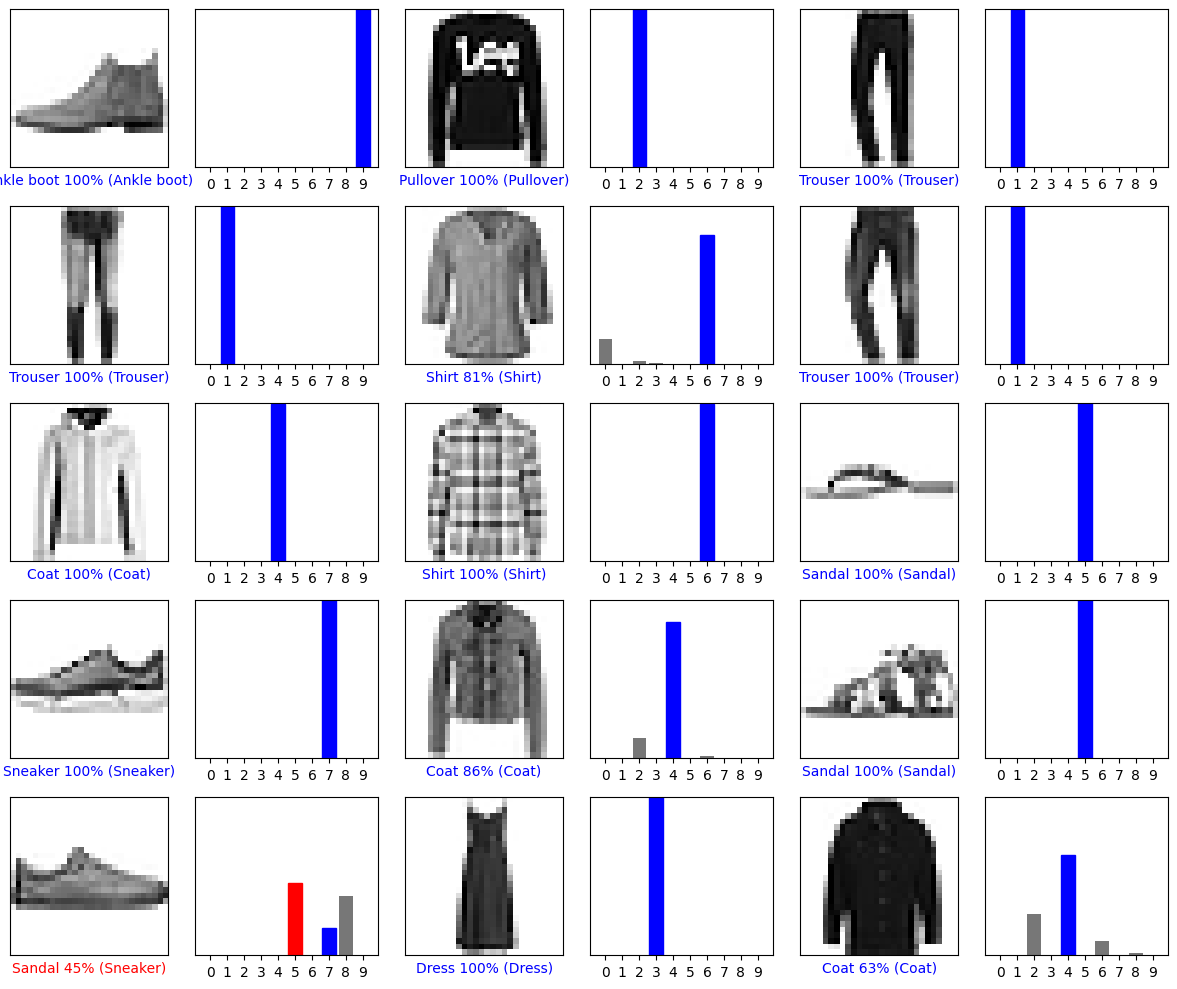

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

훈련된 모델 사용

In [26]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 22ms/step
[[2.7428059e-05 4.2364858e-14 9.9978107e-01 4.0209214e-10 8.7394852e-05
  1.4109156e-11 1.0417167e-04 6.5053491e-13 8.1624596e-10 2.2021496e-13]]


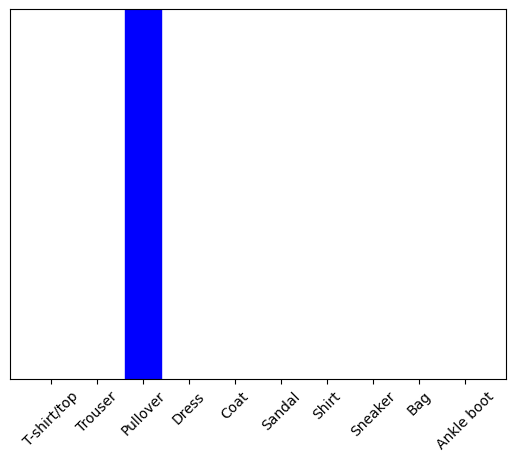

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [31]:
np.argmax(predictions_single[0])

2